## Experiment done here

### Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Load Train & Test Files

In [4]:
train_df = pd.read_csv("train_data.csv")
test_df = pd.read_csv("test_data.csv")

train_df.head(), test_df.head()

(      TV  Radio  Newspaper  Sales
 0  204.1   32.9       46.0   19.0
 1  216.4   41.7       39.6   22.6
 2  165.6   10.0       17.6   12.6
 3  243.2   49.0       44.3   25.4
 4  289.7   42.3       51.2   25.4,
       TV  Radio  Newspaper  Sales
 0   59.6   12.0       43.1    9.7
 1  175.7   15.4        2.4   14.1
 2  284.3   10.6        6.4   15.0
 3    0.7   39.6        8.7    1.6
 4  216.4   41.7       39.6   22.6)

### Split into Features (X) and Target (y)

In [5]:
X_train = train_df[['TV', 'Radio', 'Newspaper']]
y_train = train_df['Sales']


In [6]:
X_test = test_df[['TV', 'Radio', 'Newspaper']]
y_test = test_df['Sales']


### Create and Train the Model

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### View Model Coefficients

In [8]:
print("Intercept:", model.intercept_)
coeff_df = pd.DataFrame({
    'Feature': ['TV', 'Radio', 'Newspaper'],
    'Coefficient': model.coef_
})
coeff_df


Intercept: 2.623355907347827


,Feature,Coefficient
0,TV,0.046941
1,Radio,0.187753
2,Newspaper,0.005452


### Predict on Test Data

In [9]:
y_pred = model.predict(X_test)


### Calculate Evaluation Metrics

In [10]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

mae, mse, rmse, r2


(1.3709022718619888,
 3.2111966803776455,
 np.float64(1.7919812165247841),
 0.8579925417593164)

#### Compute residuals:

In [11]:
residuals = y_test - y_pred


#### Plot residuals vs predicted

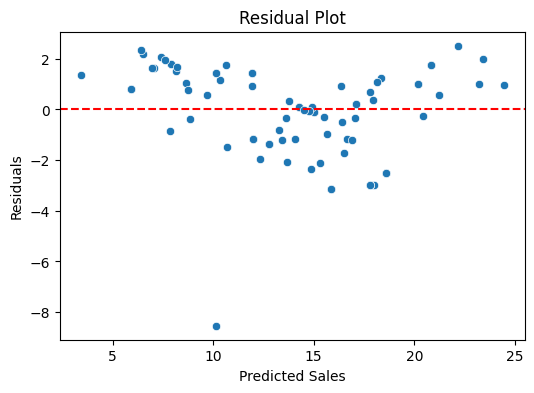

In [12]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Sales")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


### Distribution of Residuals

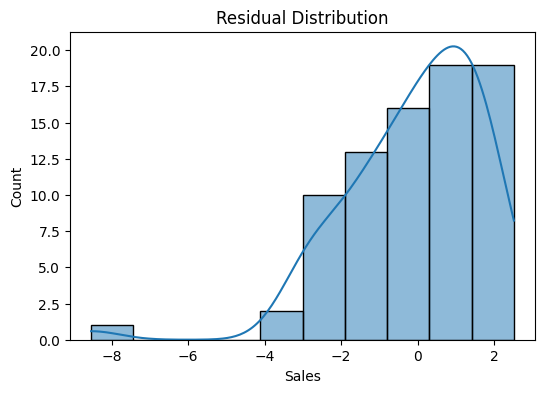

In [13]:
plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()


## Scatter Plot: Actual vs Predicted

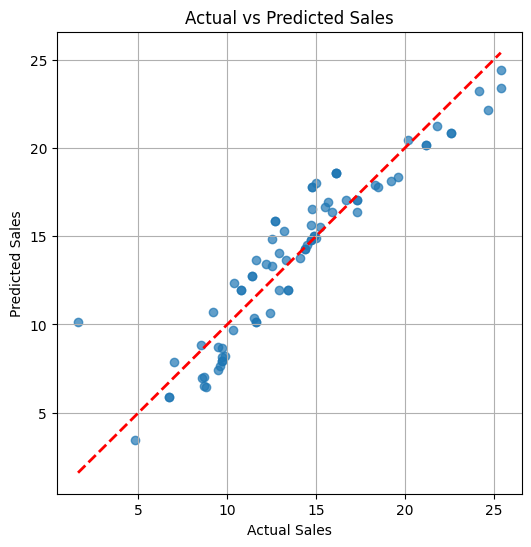

In [14]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.7)

# Perfect prediction line
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linestyle='--', linewidth=2)

plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.grid(True)
plt.show()
